In [4]:
# Griffin Austin
# Trey Grossman
# Caitlynn Koback
# Jonathan Gregg


import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

def num_vertices(edges: list):
    vertices = []
    for e in edges:
        vertices.extend(list(e))  # add both vertices from e to vertices list
    return len(set(vertices))  # set only allows one of each value


def degree(edges: list, index: int):
    degree_counter = 0
    for e in edges:
        if index in e:
            degree_counter += 1
    return degree_counter


def clustering_coeff(edges: list, index: int):
    if degree(edges, index) < 2:
        return 0
    else:
        adj = adj_matrix(edges)
        neighbors = []
        for i in range(len(adj)):
            if adj[index][i] > 0:
                neighbors.append(i)
        neighbor_edges = 0
        for source in neighbors:
            for target in neighbors:
                neighbor_edges += adj[source][target]
                adj[target][source] = 0
        return neighbor_edges / math.comb(len(neighbors), 2)


def betweenness_centrality(edges: list, index: int):
    num_verts = num_vertices(edges)
    bc = 0
    for j in range(1, num_verts+1):
        for k in range(1, num_verts+1):
            if j != index and k != index:
                all_shortest_paths = nx.all_shortest_paths(nx.from_edgelist(edges), j, k)
                paths = [p for p in all_shortest_paths]
                numerator = len(paths)
                denominator = 0
                for path in paths:
                    for node in path[1:]:
                        if node == index:
                            denominator += 1
                if denominator > 0:
                    bc += numerator / denominator / 2  # divide by two because we are counting each path twice (i.e., once when source=j target=k and once when source=k target=j)
    return bc


def avg_shortest_path_len(edges: list):
    path_sum = 0
    num_paths = 0
    vertices = num_vertices(edges)
    G = nx.from_edgelist(edges)
    for start in range(1, vertices + 1):
        for end in range(1, vertices + 1):
            path_sum += nx.shortest_path_length(G, source=start, target=end)
            num_paths += 1
    return path_sum / num_paths


def adj_matrix(edges: list):
    dimension = num_vertices(edges) + 1  # +1 since indexing starts at 0 but vertex indexing starts at 1
    adj = np.zeros((dimension, dimension))
    for s, e in edges:
        adj[s][e] += 1
        adj[e][s] += 1
    return adj

Produce a visualization of the graph (or graph sample that you used).

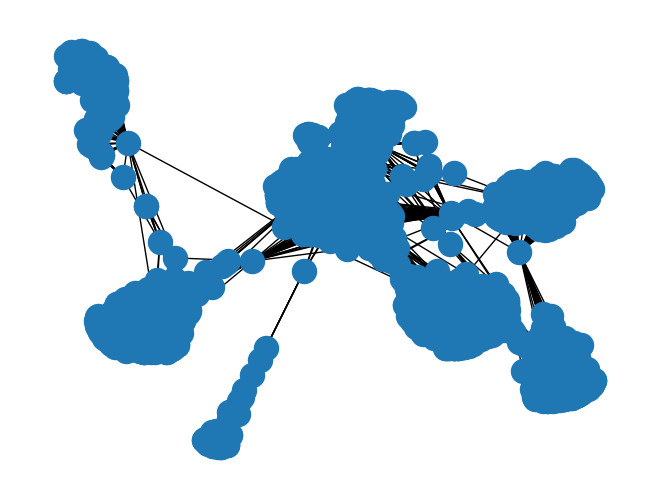

In [5]:
G = nx.read_edgelist('facebook_combined.txt')
nx.draw(G)

Find the 10 nodes with the highest degree.

In [6]:
sorted_degrees = sorted(G.degree, key=lambda deg: deg[1], reverse=True)
sorted_degrees[0:10]

[('107', 1045),
 ('1684', 792),
 ('1912', 755),
 ('3437', 547),
 ('0', 347),
 ('2543', 294),
 ('2347', 291),
 ('1888', 254),
 ('1800', 245),
 ('1663', 235)]

Find the 10 nodes with the highest betweenness centrality.

In [7]:
bc = nx.betweenness_centrality(G)
sorted_bc = sorted(bc, key=bc.get, reverse=True)
sorted_bc[0:10]

['107', '1684', '3437', '1912', '1085', '0', '698', '567', '58', '428']

Find the 10 nodes with the highest clustering coefficient. If there are ties, choose 10 to report and explain how the 10 were chosen

In [8]:
cc = nx.clustering(G)
sorted_cc = sorted(cc, key=cc.get, reverse=True)
print(sorted_cc[0:10])

['32', '33', '35', '42', '44', '46', '47', '52', '63', '70']


Find the top 10 nodes as ranked by eigenvector centrality



In [9]:
ec = nx.eigenvector_centrality(G)
sorted_ec = sorted(ec, key=ec.get, reverse=True)
print(sorted_ec[0:10])

['1912', '2266', '2206', '2233', '2464', '2142', '2218', '2078', '2123', '1993']


Find the top 10 nodes as ranked by Pagerank

In [10]:
pr = nx.pagerank(G)
sorted_pr = sorted(pr, key=pr.get, reverse=True)
sorted_pr[0:10]

['3437', '107', '1684', '0', '1912', '348', '686', '3980', '414', '698']

Compute the average shortest path length in the graph.

In [11]:
asp = nx.average_shortest_path_length(G)
print(asp)

3.6925068496963913


Average clustering coefficient

In [12]:
x = 0
y = 0

for key in cc:
  x = x + cc[key]
  y = y + 1

print(x/y)

0.6055467186200876


Plot the degree distribution of the graph on a log-log-scale

Text(0, 0.5, 'Frequency')

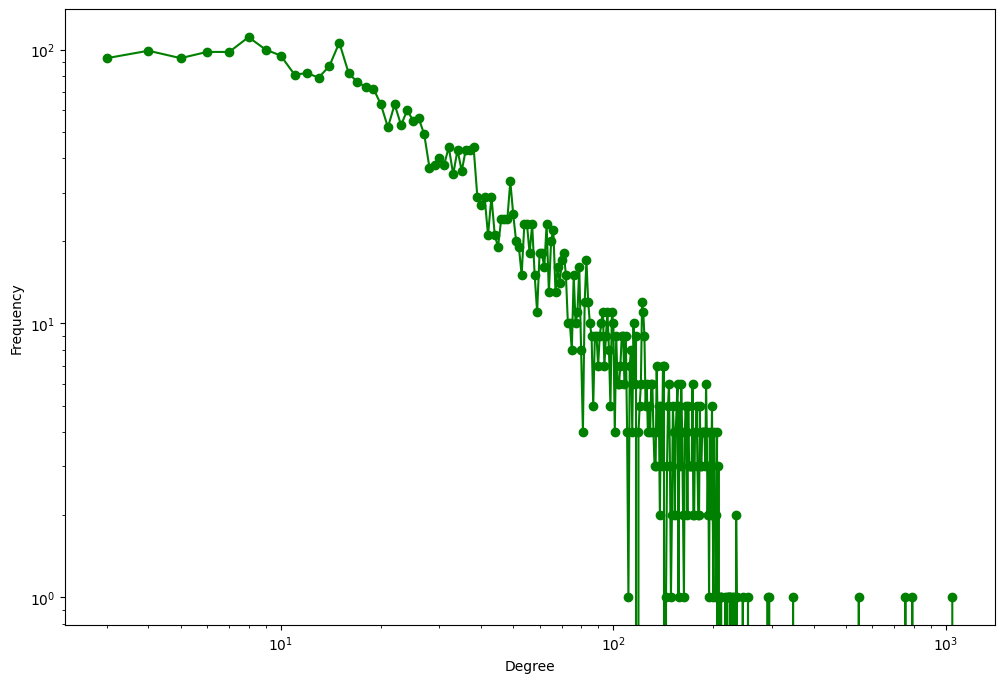

In [13]:
m = 3

degree_frequency = nx.degree_histogram(G)
degrees = range(len(degree_frequency))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_frequency[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')